Hunter Bennett  
Glass Lab  
Created 171211 | Last updated 171211  
____________  
This notebook compares our simple DESeq model to the expanded model with a strain:diet interaction term

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import subprocess
import os
import sys
import glob
import re

# import user defined packages
sys.path.insert(0, '/home/h1bennet/scripts')
import hbUtils

# plot matplotlib plots in notebook
%matplotlib inline

# load extension for running R from python
%load_ext rpy2.ipython

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: During startup - 
  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: package ‘methods’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: package ‘datasets’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 3: package ‘utils’ was built under R version 3.3.3 

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6

In [3]:
# define path to data
datapath = {'liver':'/data/mm10/Liver/RNA/', 'kupffer':'/data/mm10/Kupffer/RNA/'}

# define output directory
outdir = '/home/h1bennet/liverStrains/results/171211_DESeqComp/'
if not os.path.isdir(outdir):
    subprocess.call(['mkdir', outdir])

# define samples for both whole liver and kupffer
samples = {'liver':['aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam',
'aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam', # balb3a had 'massive splenomegaly'
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3C_TDT_JSS_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3D_TDT_JSS_16_09_28.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1A_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam',
'balbc_WholeLiver_RNA_polyA_ControlDiet_30week_BALB1C_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam',
'NCoRWT_WholeLiver_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19',
'NCoRWT_WholeLiver_RNA-polyA-AMLNDiet-30week-LN141A-JSS-TDT-16-09-21',
'NCoRWT_WholeLiver_RNA-polyA-ControlDiet-30week-LN134B-JSS-TDT-16-09-21',
'NCoRWT_WholeLiver_RNA-polyA-ControlDiet-30week-LN134C-JSS-TDT-16-09-19',
'NCoRWT_WholeLiver_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21'],
'kupffer':["aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26",
"aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26",
"aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28",
"aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28",
"aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3a_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26",
"balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28", # balb3a had 'massive splenomegaly'
"balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28",
"balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1d_JSS_TDT_16_09_28",
"NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN136C_JSS_TDT_16_09_19",
"NCoRWT_KupfferTotal_RNA_polyA_AMLNDiet_30week_LN141A_JSS_TDT_16_09_21",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134B_JSS_TDT_16_09_21",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134C_JSS_TDT_16_09_19",
"NCoRWT_KupfferTotal_RNA_polyA_ControlDiet_30week_LN134D_JSS_TDT_16_09_21"]}

bad_samples = {'LN140D': 'cancer', 'LN136B': 'cancer', 'LN148B': 'cancer',
              'LN144A': 'cancer', 'LN144C': 'cancer', 'LN182B': 'cancer',
              'LN182B': 'cancer', 'LN203B': 'cancer', 'BALB3A': 'splenomegaly',
              'BALB4D': 'hyper-fibrosis', 'LN148B': 'cancer', 'LN166A': 'cancer'}

In [4]:
# define sample data frame
samplesDF = pd.DataFrame([s for groups in samples.values() for s in groups], columns = ['subject'])
samplesDF['sample_type'] = ['liver' if 'WholeLiver' in name else 'kupffer' for name in samplesDF.subject]
samplesDF['path'] = [datapath[key] + s for key in datapath.keys() for s in samples[key]]
samplesDF['batch'] = pd.factorize(samplesDF.subject\
             .str.replace('-','_')\
             .str.findall(r'(\d+_\d+_\d+)').str[0])[0]
samplesDF['strain'] = [j.replace('-', '_').split('_')[0].lower() for j in samplesDF.subject]
samplesDF['diet'] = ['amln' if 'AMLN' in name else 'control' for name in samplesDF.subject]
samplesDF['group'] = samplesDF.strain + '-' + samplesDF.diet
samplesDF['group_tissue'] = samplesDF.strain + '-' + samplesDF.diet + '-' + samplesDF.sample_type
samplesDF['exclusion'] = samplesDF.subject.str.contains('|'.join(bad_samples.keys()),
                                                       flags=re.IGNORECASE)

In [5]:
# set colors for the samples
color_dict = {'aj-control':'#fb9a99', 'aj-amln':'#e31a1c',
              'balbc-control':'#a6cee3', 'balbc-amln':'#1f78b4',
              'ncorwt-control':'#b2df8a', 'ncorwt-amln':'#33a02c'}
color_dict_tissue = {'aj-control-kupffer':'#fb9a99', 'aj-amln-kupffer':'#e31a1c',
            'balbc-control-kupffer':'#a6cee3', 'balbc-amln-kupffer':'#1f78b4',
            'ncorwt-control-kupffer':'#b2df8a', 'ncorwt-amln-kupffer':'#33a02c',
            'aj-control-liver':'#fdae6b', 'aj-amln-liver':'#e6550d',
            'balbc-control-liver':'#bcbddc', 'balbc-amln-liver':'#756bb1',
            'ncorwt-control-liver':'#bdbdbd', 'ncorwt-amln-liver':'#737373'}
samplesDF['color'] = [color_dict[group] for group in samplesDF.group]

# write out samplesDF
samplesDF.to_csv(outdir + 'amln_samples.txt', sep='\t')

Set some user defined functions

In [6]:
def tpm_paired_scatter(tpm, strain, tissue):
    tmp_df = hbUtils.df_col_subset(tpm, strain + '.*' + tissue)
    tmp_df.columns = pd.Series(tmp_df.columns).str.extract('[_-]([a-zA-Z]+[0-9]+[a-zA-Z])[_-]',
                                                                   flags=re.IGNORECASE, expand=False)
    g = sns.PairGrid(np.log2(tmp_df + 1))
    g = g.map(plt.scatter)
    corrs = np.log(tmp_df + 1).corr().values.flatten()
    for ax, corrval in zip(g.axes.flat, corrs):
        ax.text(0, 16, "r = %.2f" % corrval, fontsize=9)
        
def makeHub(samplelist, name, genome, plotoption=None, force=True):
    '''Takes a list of samples and runs the homer makeMultiWigHub.pl command with them
    '''
    mwcall = ['makeMultiWigHub.pl', name, genome]
    if plotoption != None:
        mwcall.extend(['-'+plotoption])
    mwcall.extend(['-url', 'http://homer.ucsd.edu/hubs/',
            '-webdir', '/homer_data/www/html/hubs'])
    if force:
        mwcall.extend(['-force'])
    mwcall.extend(['-d'])
    mwcall.extend(list(samplelist))
    subprocess.call(mwcall)

            
# define function for labeling points in scatterplots
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
def process_rpkm(rpkm, conv_tpm = False):
    rpkm = rpkm.loc[rpkm.Length >= 200, :]

    # Create column for gene
    rpkm.loc[:, 'Gene'] = pd.Series([x.split('|')[0] for x in rpkm['Annotation/Divergence']])

    # clean up the columns a bit
    pattern = r"\s+\(.+\)$"
    rpkm.columns = pd.Series(rpkm.columns)\
            .str.replace(pattern, '')\
            .str.split('/')\
            .str[-1]
        
    #subset matrix of only counts
    rpkm_mat = rpkm.set_index('RepeatID').loc[:, rpkm.columns[
            rpkm.columns.to_series().str.contains('RNA')]]

    # create tpm matrix
    if conv_tpm:
        tpm_mat = rpkm_mat.apply(lambda x: x * (10**6)/x.sum())
        return tpm_mat
    else:
        return rpkm_mat

#### Anotate the RNA Seq Samples using python wrapper for annotateRepeats from the Homer package

In [7]:
# set analyses we want to do 
# No longer include genes. After discussion with Ty Troutman running analyzeRepeats with
# the 'condenseGenes' flag will collapse transcripts into one. Thus the ideal way to do
# RNA Seq for now is 'exons' - count only in exons, along with condenseGenes.
analyses = [# ('genes', False, None),
            # ('genes', True, None),
            # ('genes', 'False', 'rlog'), # ignore the rlog transform values for now
            # ('genes', False, 'rpkm'),
            ('exons', False, None),
            ('exons', True, None),
            ('exons', False, 'rlog'), # ignore the rlog transform values for now
            ('exons', False, 'rpkm')]

In [8]:
# run annotate repeats with set of analysis options
for count_type, raw, norm in analyses:
    
    # generate file name
    filename = outdir + '/rnaseq_matrix_condenseGenes_' + count_type
    if raw:
        filename += '_raw'
    if norm != None:
        filename += ('_'+ str(norm))
    filename += '.txt'
    
    # run annotate repeats
    if not os.path.isfile(filename):
        out, err = hbUtils.run_annotateRepeats(samplesDF.path,
                countType=count_type, raw=raw, norm=norm, print_out=True)
        f = open(filename, 'w')
        f.write(out.decode('utf-8'))
        f.close()
        print(err.decode('utf-8'))

analyzeRepeats.pl rna mm10 -count exons -condenseGenes -norm 1e7 -d /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam /data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam /data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam /data/mm1

	Tag Directories:
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA

	Normalizing with -rlog (R must be installed with package DESeq2)
	Tag Directories:
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_s

	Tag Directories:
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_AMLNDiet_30week_AJ3C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1A_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1B_JSS_TDT_16_09_26.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/aj_WholeLiver_RNA_polyA_ControlDiet_30week_AJ1C_JSS_TDT_16_09_28.aj.star_shifted_from_AJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3A_JSS_TDT_16_09_28.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA_polyA_AMLNDiet_30week_BALB3B_JSS_TDT_16_09_26.balbcj.star_shifted_from_BALBCJ.sam
		/data/mm10/Liver/RNA/balbc_WholeLiver_RNA

#### Filter genes with length < 200 bp

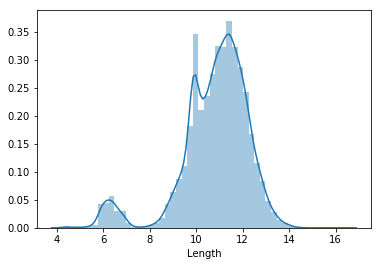

In [12]:
rpkm = pd.read_csv(outdir + '/rnaseq_matrix_condenseGenes_exons_rpkm.txt', sep='\t')
sns.distplot(np.log2(rpkm.Length + 1))

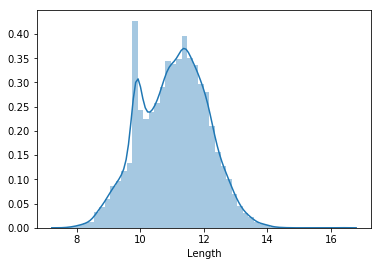

In [13]:
# Filter small mRNAs (transcripts with length < 200 - mostly snoRNAs)
rpkm = rpkm.loc[rpkm.Length >= 200, :]
sns.distplot(np.log2(rpkm.Length + 1))

## Differential Analysis (DESeq2)

Prep data for importing into R

In [17]:
# import the raw count file
raw_counts_file = '/rnaseq_matrix_condenseGenes_exons_raw.txt'
counts_df = pd.read_csv(outdir + raw_counts_file, sep='\t')

# drop samples that need to be excluded
to_drop = pd.Series(counts_df.columns).str.contains(
        '|'.join(samplesDF.subject[samplesDF.exclusion == True]))
to_drop[0] = False
counts_df = counts_df.loc[:, list(~to_drop)]
counts_df.head()

# create gene name column
counts_df['Gene'] = pd.Series([x.split('|')[0] for x in counts_df['Annotation/Divergence']])

# clean up columns
counts_df.columns = pd.Series(counts_df.columns)\
        .str.split(r" \(").str[0]\
        .str.split('/.*/').str[-1]
counts_df = counts_df.set_index('Transcript/RepeatID')

#### Write the data for DESeq2

Liver

In [18]:
# Liver
# raw count matrix for DESeq
counts_mat_l = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'liver'), 'aj|balb|ncor')
liver_raw_counts_file = raw_counts_file.replace('.txt', '_liver_mat_deseq.txt')                                    
if not os.path.isfile(outdir + liver_raw_counts_file):
    counts_mat_l.to_csv(outdir + liver_raw_counts_file, sep='\t')
    
# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_l = samplesDF.loc[(samplesDF.sample_type=='liver') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_l = col_data_l.set_index('subject')
liver_col_file = raw_counts_file.replace('.txt', 'liver_col_info.txt')
if not os.path.isfile(outdir + liver_col_file):
    col_data_l.to_csv(outdir + liver_col_file, sep='\t')

Kupffer cells

In [19]:
# raw count matrix for DESeq
counts_mat_k = hbUtils.df_col_subset(hbUtils.df_col_subset(counts_df, 'kupffer'), 'aj|balb|ncor')
kupffer_raw_counts_file = raw_counts_file.replace('.txt', '_kupffer_mat_deseq.txt')                                   
if not os.path.isfile(outdir + kupffer_raw_counts_file):
    counts_mat_l.to_csv(outdir + kupffer_raw_counts_file, sep='\t')

# Column Data Information for DESeq, make sure to drop the samples we are excluding
col_data_k = samplesDF.loc[(samplesDF.sample_type=='kupffer') & ~samplesDF.exclusion,
                           ['subject', 'strain', 'diet', 'sample_type']]
col_data_k = col_data_k.set_index('subject')
kupffer_col_file = raw_counts_file.replace('.txt', 'kupffer_col_info.txt')
if not os.path.isfile(outdir + kupffer_col_file):
    col_data_k.to_csv(outdir + kupffer_col_file, sep='\t')

### Use likelihood ratio test to compare the two models. For how many genes is the strain:diet interaction effect important?

First lookin in the kupffer cell data

In [20]:
%%R -i counts_mat_k,col_data_k,outdir
# load DESeq
library("DESeq2")

col_data_k$diet <- relevel(col_data_k$diet, ref='control')
col_data_k$strain <- relevel(col_data_k$strain, ref='ncorwt')

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ strain + diet + strain:diet)

# run DESeq LRT to assess effect of strains on diet
dds <- DESeq(dds, test="LRT", reduced= ~ strain + diet)
res <- results(dds, alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/lrt_kupffer_strainsdiet_interaction_deseq_results.txt"))

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: S4Vectors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: stats4

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘BiocGenerics’


  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rp

In [27]:
%%R -i counts_mat_l,col_data_l,outdir
# load DESeq
library("DESeq2")

col_data_l$diet <- relevel(col_data_l$diet, ref='control')
col_data_l$strain <- relevel(col_data_l$strain, ref='ncorwt')

# not sure why we have to do this but the data is matched in order
# so it won't change the results
names(counts_mat_l) <- NULL

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_l,
                             colData = col_data_l,
                             design = ~ strain + diet + strain:diet)

# run DESeq LRT to assess effect of strains on diet
dds <- DESeq(dds, test="LRT", reduced= ~ strain + diet)
res <- results(dds, alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/lrt_liver_strainsdiet_interaction_deseq_results.txt"))

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: converting counts to integer mode

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating size factors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating dispersions

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: gene-wise dispersion estimates

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: mean-dispersion relationship

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntim

### assess effect of interaction term
____
Genes should have a significant p value if their distribution is better fit by the model with the interaction feature compared to the model without it.

False    24439
True        98
Name: padj, dtype: int64


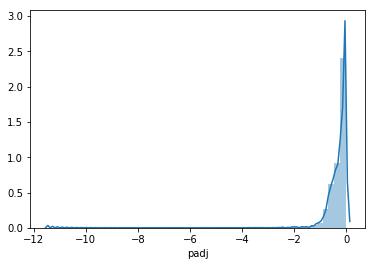

In [28]:
intx_k = pd.read_csv(outdir + "/lrt_kupffer_strainsdiet_interaction_deseq_results.txt")
print((intx_k.padj <= 0.01).value_counts())
sns.distplot(np.log10(intx_k.padj.dropna()))

False    24463
True        74
Name: padj, dtype: int64


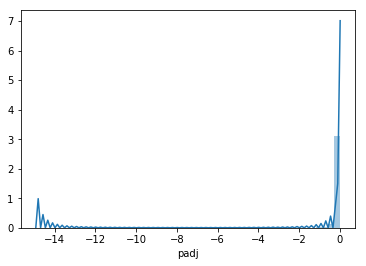

In [29]:
intx_l = pd.read_csv(outdir + "/lrt_liver_strainsdiet_interaction_deseq_results.txt")
print((intx_l.padj <= 0.01).value_counts())
sns.distplot(np.log10(intx_l.padj.dropna()))

#### Run DESeq2 without interaction model
____
This is following the DESeq manual for how to model interactions. See online documentation or enter '?results' in R with DESeq2 package loaded.

In [31]:
col_data_k

,strain,diet,sample_type
subject,,,
aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3A_JSSTDT_16_09_26,aj,amln,kupffer
aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3B_JSSTDT_16_09_26,aj,amln,kupffer
aj_KupfferTotal_RNA_polyA_AMLNDiet_30week_AJ3c_JSS_TDT_16_09_28,aj,amln,kupffer
aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1c_JSS_TDT_16_09_28,aj,control,kupffer
aj_KupfferTotal_RNA_polyA_ControlDiet_30week_AJ1d_JSS_TDT_16_09_28,aj,control,kupffer
balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3B_JSSTDT_16_09_26,balbc,amln,kupffer
balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3C_JSSTDT_16_09_26,balbc,amln,kupffer
balbc_KupfferTotal_RNA_polyA_AMLNDiet_30week_Balb3d_JSS_TDT_16_09_28,balbc,amln,kupffer
balbc_KupfferTotal_RNA_polyA_ControlDiet_30week_Balb1c_JSS_TDT_16_09_28,balbc,control,kupffer


In [150]:
%%R -i counts_mat_k,col_data_k,outdir
# load DESeq
library("DESeq2")

col_data_k$diet <- relevel(col_data_k$diet, ref='control')
col_data_k$strain <- relevel(col_data_k$strain, ref='ncorwt')
col_data_k$group <- paste(col_data_k$strain, col_data_k$diet, sep='_')

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ group)

# run DESeq with reduced model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('group', 'ncorwt_amln', 'ncorwt_control'), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_amln_deseq_reducedmodel_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=c('group', 'balbc_amln','balbc_control'), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_amln_deseq_reducedmodel_results.txt"))

# diet effect for aj
res <- results(dds, contrast=c('group', 'aj_amln', 'aj_control'), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_amln_deseq_reducedmodel_results.txt"))

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: converting counts to integer mode

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating size factors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating dispersions

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: gene-wise dispersion estimates

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: mean-dispersion relationship

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntim

In [63]:
%%R -i counts_mat_l,col_data_l,outdir
# load DESeq
library("DESeq2")

col_data_l$diet <- relevel(col_data_l$diet, ref='control')
col_data_l$strain <- relevel(col_data_l$strain, ref='ncorwt')
col_data_l$group <- paste(col_data_l$strain, col_data_l$diet, sep='_')

# not sure why we have to do this but the data is matched in order
# so it won't change the results
names(counts_mat_l) <- NULL

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_l,
                             colData = col_data_l,
                             design = ~ group)

# run DESeq with reduced model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('group', 'ncorwt_amln', 'ncorwt_control'), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_amln_liver_deseq_reducedmodel_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=c('group', 'balbc_amln','balbc_control'), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_amln_liver_deseq_reducedmodel_results.txt"))

# diet effect for aj
res <- results(dds, contrast=c('group', 'aj_amln', 'aj_control'), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_amln_liver_deseq_reducedmodel_results.txt"))

/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: converting counts to integer mode

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating size factors

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: estimating dispersions

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: gene-wise dispersion estimates

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: mean-dispersion relationship

  warnings.warn(x, RRuntimeWarning)
/home/h1bennet/anaconda3/envs/deseq/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntim

In [139]:
%%R -i counts_mat_k,col_data_k,outdir
# load DESeq
library("DESeq2")

col_data_k$diet <- relevel(col_data_k$diet, ref='control')
col_data_k$strain <- relevel(col_data_k$strain, ref='ncorwt')

#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_k,
                             colData = col_data_k,
                             design = ~ strain + diet + strain:diet)

# run DESeq with full model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'amln', 'control'), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_amln_deseq_fullmod_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainbalbc.dietamln') ), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_amln_deseq_fullmod_results.txt"))

# diet effect for aj
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainaj.dietamln') ), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_amln_deseq_fullmod_results.txt"))

# interaction term for condition effect between balbc and ncorwt
res <- results(dds, name='strainbalbc.dietamln', alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ncorwt_amln_interaction_deseq_fullmod_results.txt"))

# interaction term for condition effect between aj and ncorwt
res <- results(dds, name='strainaj.dietamln', alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ncorwt_amln_interaction_deseq_fullmod_results.txt"))

# interaction term for condition effect between balbc and aj
res <- results(dds, contrast=list("strainbalbc.dietamln", "strainaj.dietamln"), alpha = 0.05)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_aj_amln_interaction_deseq_fullmod_results.txt"))

DataFrame with 6 rows and 2 columns
          type                                  description
   <character>                                  <character>
1 intermediate    mean of normalized counts for all samples
2      results log2 fold change (MLE): diet amln vs control
3      results         standard error: diet amln vs control
4      results         Wald statistic: diet amln vs control
5      results      Wald test p-value: diet amln vs control
6      results                         BH adjusted p-values
DataFrame with 6 rows and 2 columns
          type
   <character>
1 intermediate
2      results
3      results
4      results
5      results
6      results
                                                               description
                                                               <character>
1                                mean of normalized counts for all samples
2 log2 fold change (MLE): diet_amln_vs_control+strainbalbc.dietamln effect
3         standard error: di

In [64]:
%%R -i counts_mat_l,col_data_l,outdir
# load DESeq
library("DESeq2")

col_data_l$diet <- relevel(col_data_l$diet, ref='control')
col_data_l$strain <- relevel(col_data_l$strain, ref='ncorwt')

# not sure why we have to do this but the data is matched in order
# so it won't change the results
names(counts_mat_l) <- NULL


#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat_l,
                             colData = col_data_l,
                             design = ~ strain + diet + strain:diet)

# run DESeq with full model
dds <- DESeq(dds)

# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'amln', 'control'), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/ncorwt_amln_liver_deseq_fullmod_results.txt"))

# diet effect for balbc
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainbalbc.dietamln') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_amln_liver_deseq_fullmod_results.txt"))

# diet effect for aj
res <- results(dds, contrast=list( c('diet_amln_vs_control','strainaj.dietamln') ), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_amln_liver_deseq_fullmod_results.txt"))

# interaction term for condition effect between balbc and ncorwt
res <- results(dds, name='strainbalbc.dietamln', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_ncorwt_amln_interaction_liver_deseq_fullmod_results.txt"))

# interaction term for condition effect between aj and ncorwt
res <- results(dds, name='strainaj.dietamln', alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/aj_ncorwt_amln_interaction_liver_deseq_fullmod_results.txt"))

# interaction term for condition effect between balbc and aj
res <- results(dds, contrast=list("strainbalbc.dietamln", "strainaj.dietamln"), alpha = 0.05)
head(res)
res_ordered <- res[order(res$padj), ]
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/balbc_aj_amln_interaction_liver_deseq_fullmod_results.txt"))

### Pairwise Comparisons 

In [ ]:
def plot_full_reduced(full, reduced):
    df = full.merge(reduced, on = 'Unnamed: 0',
                              how = 'left', suffixes=['_full', '_reduced'])
    df['log10padj_full'] = -np.log10(df.padj_full)
    df['log10padj_reduced'] = -np.log10(df.padj_reduced)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    sns.regplot('log10padj_full', 'log10padj_reduced', data=df, fit_reg=True, ax=ax1)
    ax1.annotate("r = %.2f" % df.corr().loc['log10padj_full', 'log10padj_reduced'],
                  xy=(0,1), xycoords='axes fraction')
    sns.regplot('log2FoldChange_full', 'log2FoldChange_reduced', data=df, fit_reg=True, ax=ax2)
    ax2.annotate("r = %.2f" % df.corr().loc['log2FoldChange_full', 'log2FoldChange_reduced'],
            xy=(0,1), xycoords='axes fraction')

In [151]:
ncor_amln_r = pd.read_csv(outdir + "/ncorwt_amln_deseq_reducedmodel_results.txt")
ncor_amln_f = pd.read_csv(outdir + "/ncorwt_amln_deseq_fullmod_results.txt")

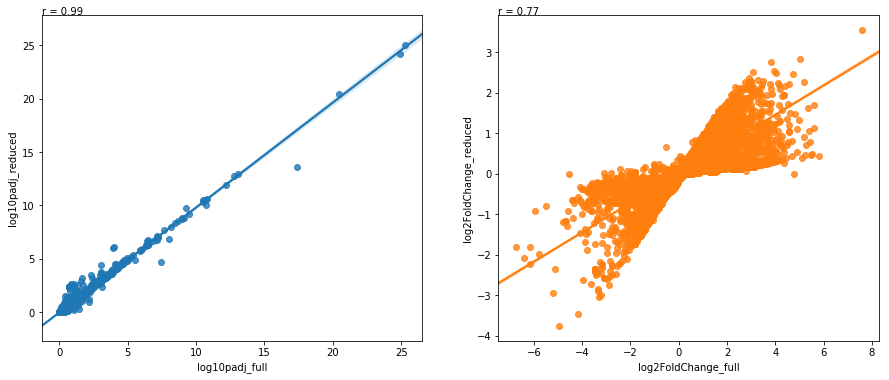

In [152]:
plot_full_reduced(ncor_amln_f, ncor_amln_r)

In [134]:
balbc_amln_r = pd.read_csv(outdir + "/balbc_amln_deseq_reducedmodel_results.txt")
balbc_amln_f = pd.read_csv(outdir + "/balbc_amln_deseq_fullmod_results.txt")

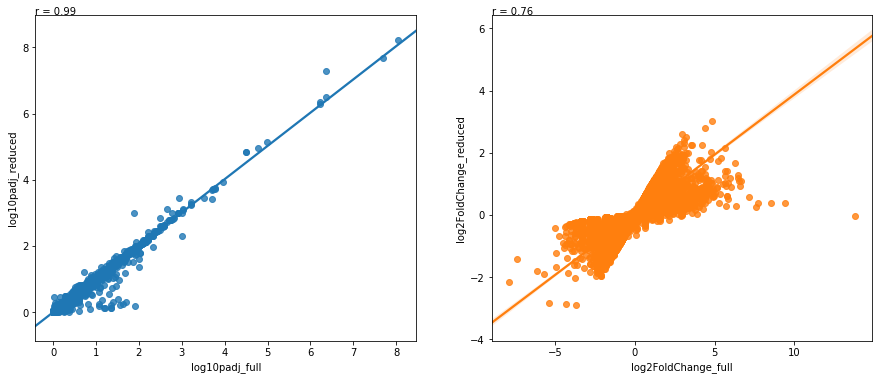

In [135]:
plot_full_reduced(balbc_amln_f, balbc_amln_r)

In [140]:
aj_amln_r = pd.read_csv(outdir + "/aj_amln_deseq_reducedmodel_results.txt")
aj_amln_f = pd.read_csv(outdir + "/aj_amln_deseq_fullmod_results.txt")

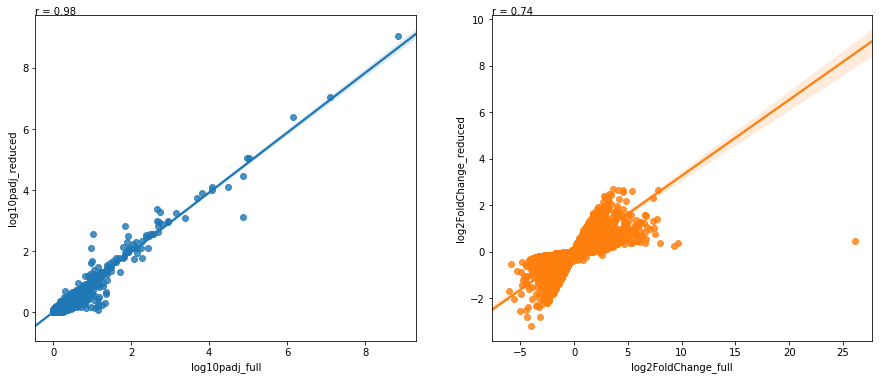

In [141]:
plot_full_reduced(aj_amln_f, aj_amln_r)

In [143]:
ncor_amln_liver_r = pd.read_csv(outdir + "/ncorwt_amln_liver_deseq_reducedmodel_results.txt")
ncor_amln_liver_f = pd.read_csv(outdir + "/ncorwt_amln_liver_deseq_fullmod_results.txt")

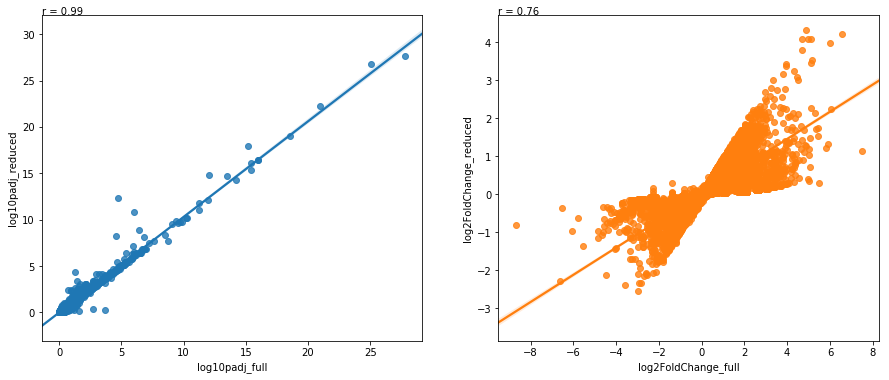

In [144]:
plot_full_reduced(ncor_amln_liver_f, ncor_amln_liver_r)

In [146]:
balbc_amln_liver_r = pd.read_csv(outdir + "/balbc_amln_liver_deseq_reducedmodel_results.txt")
balbc_amln_liver_f = pd.read_csv(outdir + "/balbc_amln_liver_deseq_fullmod_results.txt")

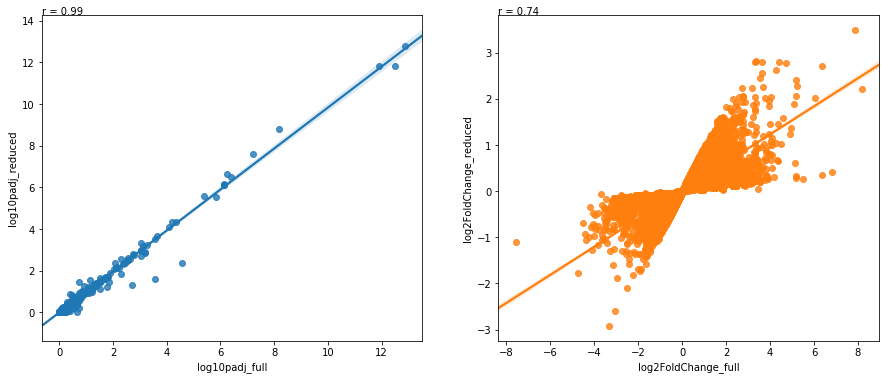

In [147]:
plot_full_reduced(balbc_amln_liver_f, balbc_amln_liver_r)

In [148]:
aj_amln_liver_r = pd.read_csv(outdir + "/aj_amln_liver_deseq_reducedmodel_results.txt")
aj_amln_liver_f = pd.read_csv(outdir + "/aj_amln_liver_deseq_fullmod_results.txt")

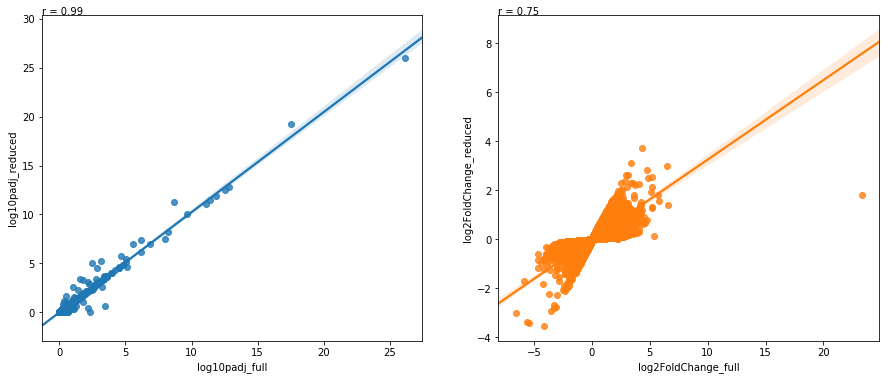

In [149]:
plot_full_reduced(aj_amln_liver_f, aj_amln_liver_r)

From these plots it seems like the models are largely consistant when compared to one another.  Lets also see if we can recover similar 'differentially regulated' genes when using the reduced model.

For the full model we would use a significantly different interaction term between the two to find diff reg genes. for this one i suppose we could use the absolute difference in fold change? The problem is its hard to logically compare the fold changes between the strains. I suppose we could look for genes that are strongly up in one strain and strongly down OR nonsignificant in the others? but the nonsignificant ones would really drive a high number

In [208]:
def get_diff_intx(amln, s1, s2):
    df = amln.merge(s1.merge(s2, how='outer', on='Unnamed: 0',
                                    suffixes=('_s1', '_s2')),
                      how='outer', on='Unnamed: 0')
    s1_spec = ((np.abs(df.log2FoldChange) >= 1) & (df.padj <=0.05) & (df.padj_s1 <= 0.05))
    s2_spec = ((np.abs(df.log2FoldChange) >= 1) & (df.padj <=0.05) & (df.padj_s2 <= 0.05))
    
    print('number of genes differentially regulated in amln diet and specific to strain')
    print(((s1_spec) & (s2_spec)).value_counts())
    
    return df.loc[((s1_spec) & (s2_spec)), 'Unnamed: 0'].tolist()

def get_diff_intx_reduced(amln, s1, s2):
    df = amln.merge(s1.merge(s2, how='outer', on='Unnamed: 0',
                                    suffixes=('_s1', '_s2')),
                      how='outer', on='Unnamed: 0')
    amln_up = ((df.log2FoldChange >= 1) & (df.padj <=0.05))    
    amln_dn = ((df.log2FoldChange <= -1) & (df.padj <=0.05))
    
    s1_amln_up = ((df.log2FoldChange_s1 >= 0.00)) # & (df.padj_s1 <= 0.05))
    s1_amln_dn = ((df.log2FoldChange_s1 <= 0.00)) # & (df.padj_s1 <= 0.05))

    s2_amln_up = ((df.log2FoldChange_s2 >= 0.00)) # & (df.padj_s2 <= 0.05))
    s2_amln_dn = ((df.log2FoldChange_s2 <= 0.00)) # & (df.padj_s2 <= 0.05))
    
    s1_spec = ((amln_up) & (s1_amln_dn)) | ((amln_dn) & (s1_amln_up))
    s2_spec = ((amln_up) & (s2_amln_dn)) | ((amln_dn) & (s2_amln_up))
    
    print(((s1_spec) & (s2_spec)).value_counts())

    return df.loc[(s1_spec) & (s2_spec), 'Unnamed: 0'].tolist()


In [218]:
balb_amln_f = pd.read_csv(outdir + "/balbc_amln_deseq_fullmod_results.txt")
balb_aj_f = pd.read_csv(outdir + "/balbc_aj_amln_interaction_deseq_fullmod_results.txt")
balb_ncorwt_f = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_deseq_fullmod_results.txt")
aj_amln_f = pd.read_csv(outdir + "/aj_amln_deseq_fullmod_results.txt")
aj_balb_f = pd.read_csv(outdir + "/balbc_aj_amln_interaction_deseq_fullmod_results.txt")
aj_ncor_f = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_deseq_fullmod_results.txt")
ncorwt_amln_f = pd.read_csv(outdir + "/ncorwt_amln_deseq_fullmod_results.txt")
ncorwt_aj_f = pd.read_csv(outdir + "/aj_ncorwt_amln_interaction_deseq_fullmod_results.txt")
ncorwt_balb_f = pd.read_csv(outdir + "/balbc_ncorwt_amln_interaction_deseq_fullmod_results.txt")

In [219]:
balb_amln_r = pd.read_csv(outdir + "/balbc_amln_deseq_reducedmodel_results.txt")
aj_amln_r = pd.read_csv(outdir + "/aj_amln_deseq_reducedmodel_results.txt")
ncorwt_amln_r = pd.read_csv(outdir + "/ncorwt_amln_deseq_reducedmodel_results.txt")

In [220]:
get_diff_intx(balb_amln_f, balb_aj_f, balb_ncor_f)

number of genes differentially regulated in amln diet and specific to strain
False    24532
True         5
dtype: int64


['NM_008037', 'NM_007570', 'NM_018808', 'NM_008361', 'NM_011267']

In [221]:
get_diff_intx_reduced(balb_amln_r, ncorwt_amln_r, aj_amln_r)

False    24527
True        10
dtype: int64


['NM_008037',
 'NM_007570',
 'NM_008361',
 'NM_011267',
 'NM_145437',
 'NM_145538',
 'NR_027852',
 'NM_001177980',
 'NM_023343',
 'NM_013533']

In [222]:
get_diff_intx(aj_amln_f, aj_balb_f, aj_ncor_f)

number of genes differentially regulated in amln diet and specific to strain
False    24536
True         1
dtype: int64


['NM_011459']

In [213]:
get_diff_intx_reduced(aj_amln_r, balbc_amln_r, ncorwt_amln_r)

False    24531
True         6
dtype: int64


['NM_011403', 'NM_019414', 'NM_011459', 'NM_009742', 'NR_002861', 'NM_009997']

In [224]:
ncor_full = get_diff_intx(ncorwt_amln_f, ncorwt_aj_f, ncorwt_balb_f)

number of genes differentially regulated in amln diet and specific to strain
False    24492
True        45
dtype: int64


In [225]:
ncor_red = get_diff_intx_reduced(ncorwt_amln_r, aj_amln_r, balbc_amln_r)

False    24474
True        63
dtype: int64


In [232]:
pd.Series([True if i in ncor_red else False for i in ncor_full]).value_counts()

True     24
False    21
dtype: int64

For balb and AJ we recover almost all of the differentially regulated RNAs using the reduced model and pairwise comparisons. While for Ncor there is a more significant difference in the results. This merits follow up in NCOR and for the different called genes in the pairwise reduced method. It seems like the interaction method is more stringent while the reduced method calls more 'differential' genes. The interaction might be a good way to limit false positives...